In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('googleplaystore.csv')

CLEANING THE DATASET

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# deleting the rows that are not any use to us

del data['Last Updated']
del data['Current Ver']
del data['Android Ver']

In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [7]:
null_in_content_rating  = data[data['Content Rating'].isnull()]
print(null_in_content_rating)


                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018  


In [8]:
# as seen in each column has slipped one value to the left so best to remove this row

data.loc[10471:10473, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools


In [9]:
# deleting the 10472th row

data = data.drop(labels=[10472], axis=0)

In [10]:
# as can be seen in type column here it says 'varies with device', best to remove this row too

null_in_type  = data[data['Type'].isnull()]
print(null_in_type)

                            App Category  Rating Reviews                Size  \
9148  Command & Conquer: Rivals   FAMILY     NaN       0  Varies with device   

     Installs Type Price Content Rating    Genres  
9148        0  NaN     0   Everyone 10+  Strategy  


In [11]:
# deleting the 9148th row

data = data.drop(labels=[9148], axis=0)

In [19]:
# there are 1473 null values in rating column

data['Rating'].isnull().sum()


1473

In [20]:
# there are 1474 null values in rating column we have to decide to fill it with mean, mode or median, so I got with mean

data['Rating'] = data['Rating'].fillna(data['Rating'].mean())


In [23]:
# there are a lot of different values in size column, we should strip 'M','.' and 'k' symbols and we should turn values with kb into MB

data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [24]:
# turning the kb into mb

k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
data.loc[k_indices,'Size'] = converter

In [25]:
# striping 'M' and changing 'varies with device' values into 0

data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data[data['Size'] == 'Varies with device'] = 0
data['Size'] = data['Size'].astype(float)

In [26]:
# deleting 0 values in size column

indexSize = data[ (data['Size'] == 0.0)].index
data.drop(indexSize , inplace=True)

In [31]:
# cleaning install column

data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', ''))
data['Installs'] = pd.to_numeric(data['Installs'])

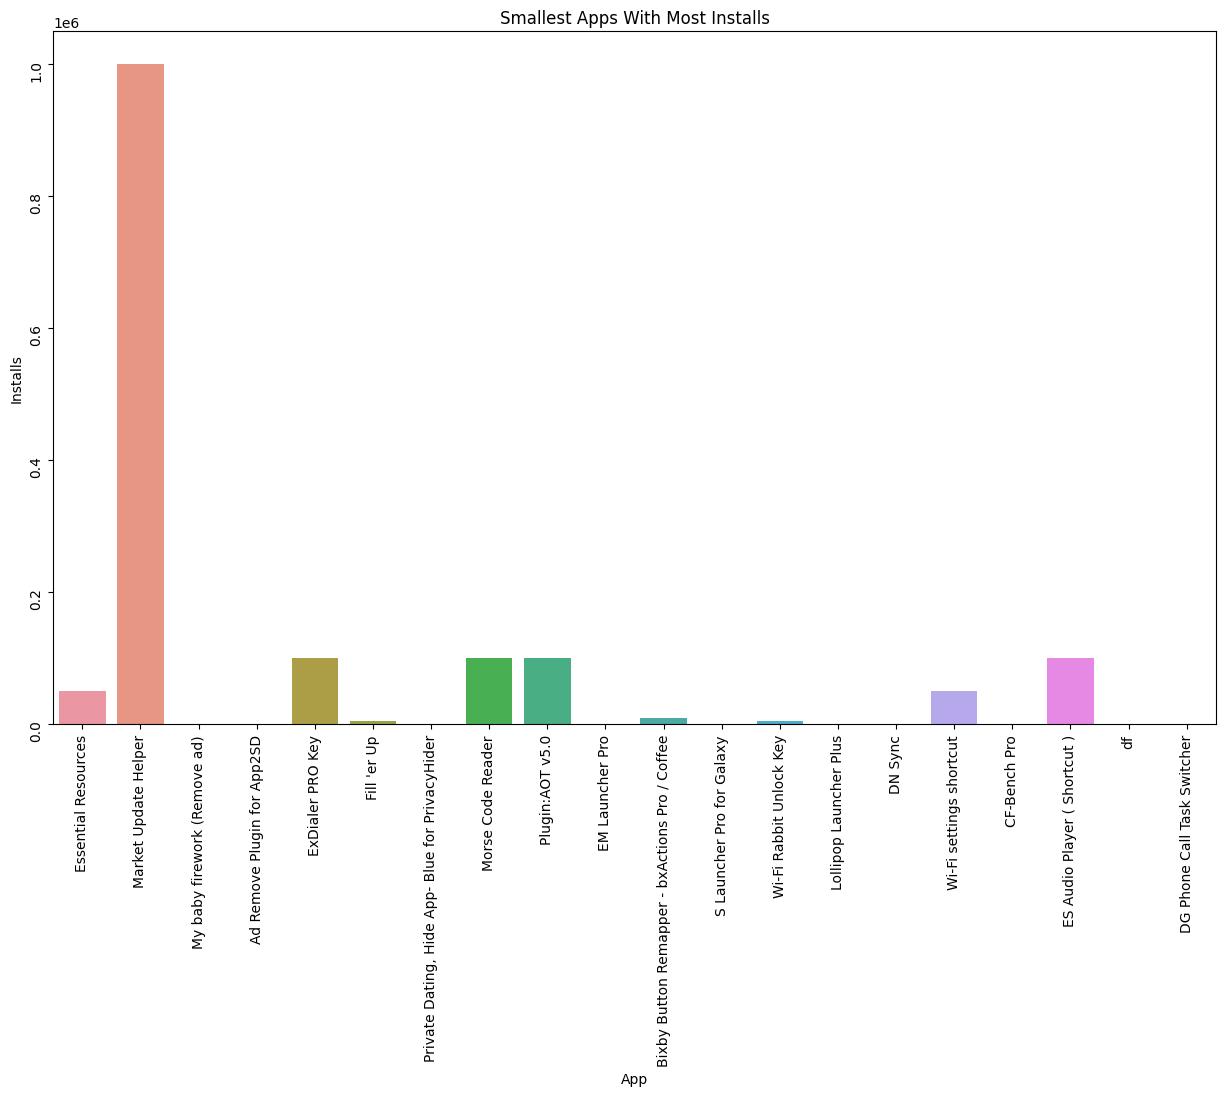

In [32]:
smallest_size = data.sort_values(['Size']).head(20)

name_of_the_apps = smallest_size['App']
number_of_installs = smallest_size['Installs']
smallest_size_app = smallest_size.sort_values(['App'], ascending=True)
 
plt.figure(figsize=(15,9))
sns.barplot(x = name_of_the_apps, y = number_of_installs, data=smallest_size)
plt.tick_params(rotation=90)
plt.title("Smallest Apps With Most Installs")
plt.show()

<AxesSubplot: ylabel='Type'>

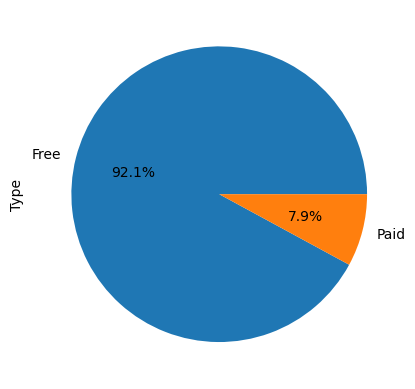

In [33]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

In [40]:
# cleaning the price column

data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data.Price.apply(lambda x: x.replace('.', ''))
data['Price'] = pd.to_numeric(data['Price'])

C:\Users\furka\AppData\Local\Temp\ipykernel_34904\2285560803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs
C:\Users\furka\AppData\Local\Temp\ipykernel_34904\2285560803.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  paid_apps.groupby('Category').sum().head(20).sort_values(by = 'Revenue')['Revenue'].plot(kind = 'bar',title='Total Revenue By Category', fontsize=10, figsize = (12, 8), colormap='plasma')


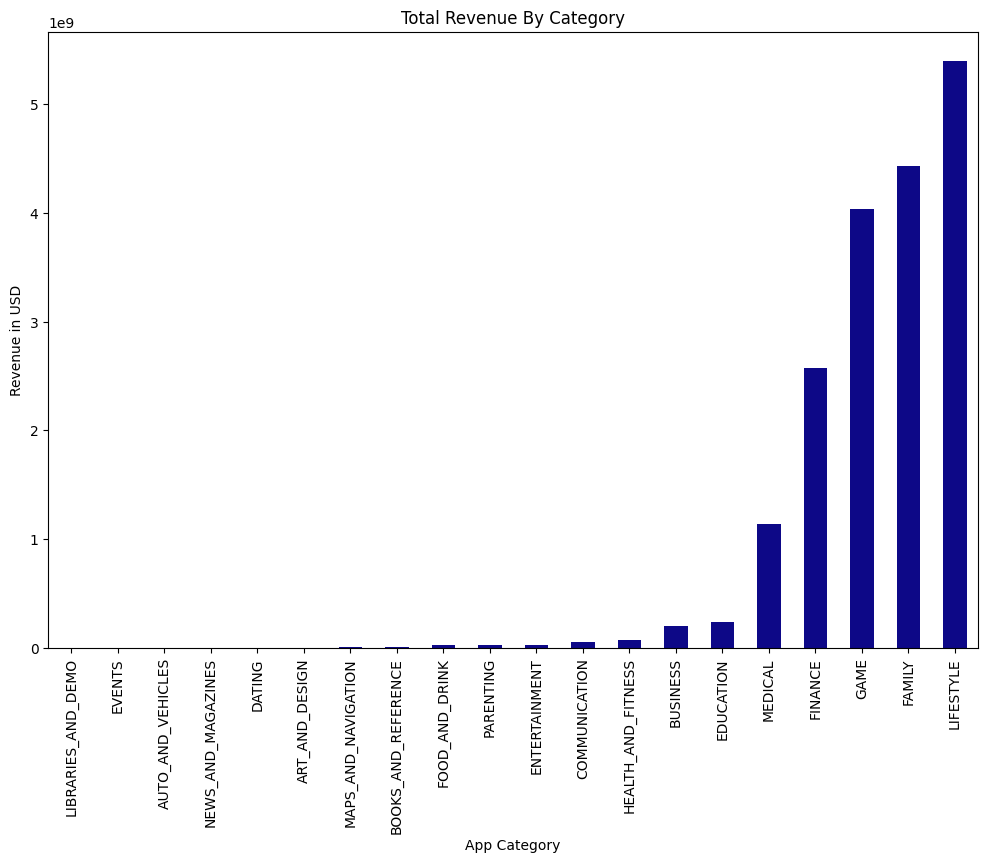

In [65]:
paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs
paid_apps.groupby('Category').sum().head(20).sort_values(by = 'Revenue')['Revenue'].plot(kind = 'bar',title='Total Revenue By Category', fontsize=10, figsize = (12, 8), colormap='plasma')
plt.xlabel('App Category')
plt.ylabel('Revenue in USD');

AxesSubplot(0.125,0.11;0.775x0.77)


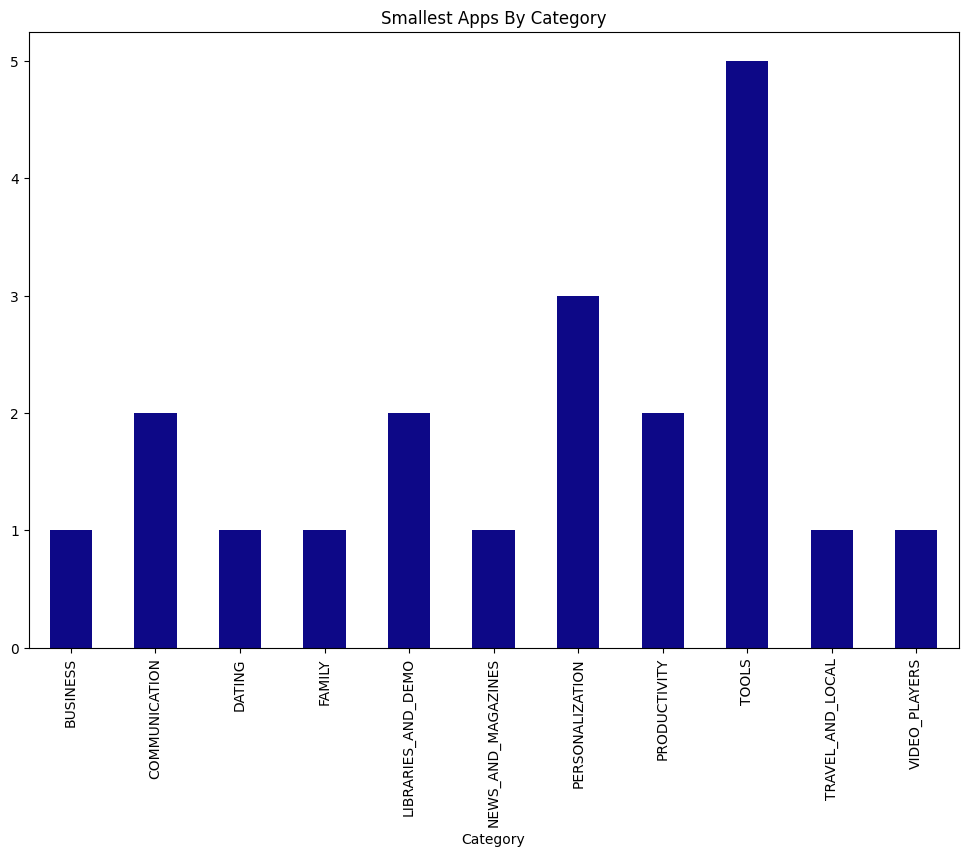

In [83]:
smallest_size = data.sort_values(['Size']).head(20)
data2 = smallest_size.groupby(['Category'])['App'].count().plot(kind = 'bar',title='Smallest Apps By Category', fontsize=10, figsize = (12, 8), colormap='plasma')
print(data2)

AxesSubplot(0.255833,0.11;0.513333x0.77)


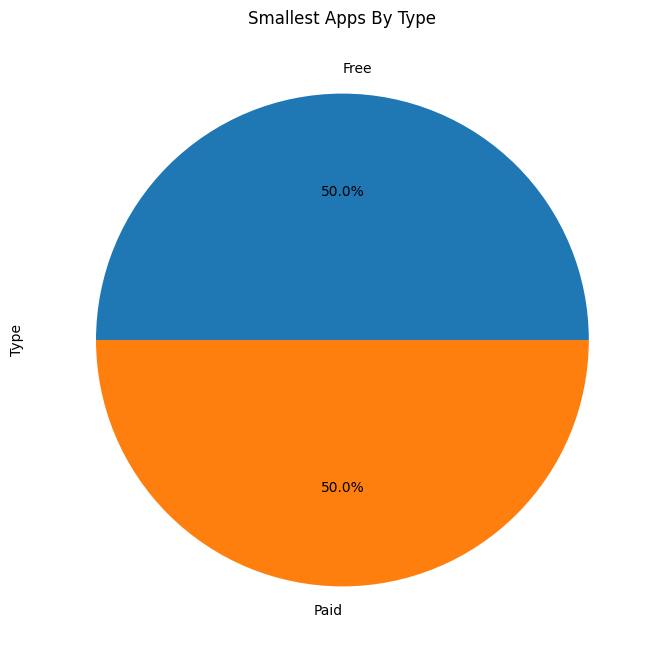

In [89]:
data3 = smallest_size.groupby(['Type'])['Type'].count().plot(kind = 'pie',autopct = "%1.1f%%",title='Smallest Apps By Type', fontsize=10, figsize = (12, 8))
print(data3)